10.0
0 5 0.5
sub 10.0
SIMPSON'S RULE APPROXIMATION of the function from 0 to 5 in 10.0 subintervals: 
	Associated Pattern:  [1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1]
	Estimate: 44.735
	X_VALS:  [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
	Y_VALS:  [0, 4.67, 7.34, 8.86, 9.73, 10.22, 10.51, 10.67, 10.76, 10.81, 10.81]


<IPython.core.display.Javascript object>


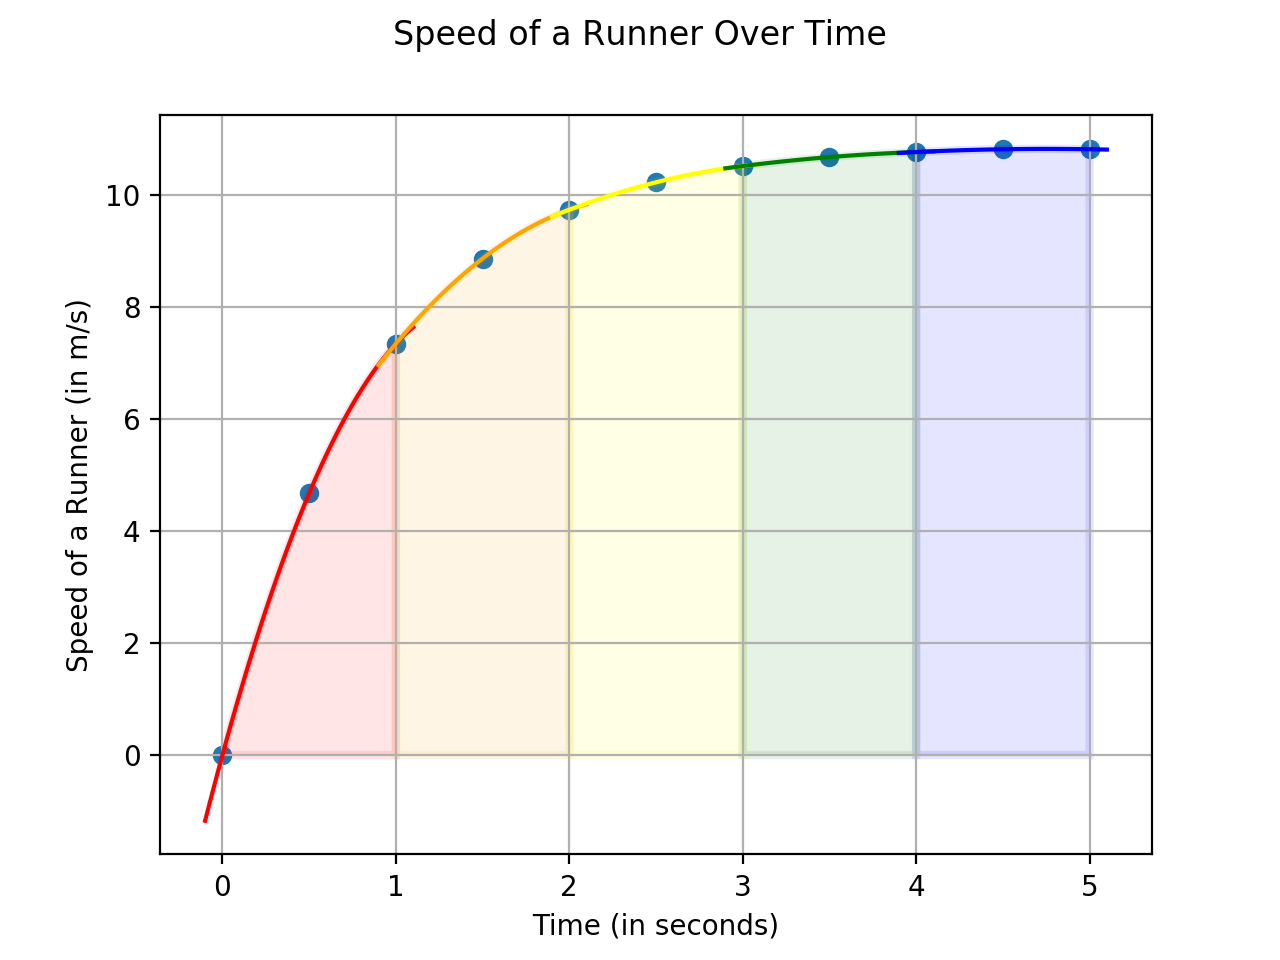

In [32]:
%matplotlib notebook
#Import Statements
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as areas
from scipy.integrate import *
from scipy.optimize import *
from scipy.misc import *
from sympy import * 
import random as rd
import math
from warnings import filterwarnings
filterwarnings("ignore", category=plt.cbook.mplDeprecation)

t_start = 0
t_end = 5
t_interval = 0.5
time = np.arange(0, 5.1, 0.5)
speed = [0, 4.67, 7.34, 8.86, 9.73, 10.22, 10.51, 10.67, 10.76, 10.81, 10.81]
subintervals = (t_end - t_start) / t_interval

def equals(a, b): 
    return abs(b - a) < 10E-9


def generate_simpson_coeff(n):
    iterations = int(n / 2)
    coeffs = [1, 4, 1]
    for i in range(1, iterations):
        coeffs[len(coeffs) - 1] += 1
        coeffs.append(4)
        coeffs.append(1)
    return coeffs

def simpsons(a, b, interval, x_vals, y_vals):
    a_index = int(a / interval)
    b_index = int(b / interval)
    subinterval = (b - a) / interval
    print(a, b, interval)
    print("sub", subinterval)
    if not equals(subinterval % interval, 0):
        return None
    coefficients = generate_simpson_coeff(int(subintervals))
    sum = 0
    k = 0
    x_val = []
    y_val = []
    for coeff in coefficients:
        x = x_vals[k]
        y = y_vals[k]
        x_val.append(x)
        y_val.append(y)
        sum += coeff * y
        k = k + 1
    simpson = interval / 3 * sum
    return simpson, x_val, y_val

def determine_parabola(start_x, x_values, y_values):
    matrix = Matrix([[x_values[start_x]**2, x_values[start_x], 1, y_values[start_x]],
                     [x_values[start_x + 1]**2, x_values[start_x + 1], 1, y_values[start_x + 1]],
                     [x_values[start_x + 2]**2, x_values[start_x + 2], 1, y_values[start_x + 2]]])
    m_rref = list(matrix.rref()[0])
    coeffs = []
    for num in range(0, len(m_rref)):
        if (num + 1) % 4 == 0:
            coeffs.append(m_rref[num])
    return lambda x : coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]

def graph_simpsons(x_vals, y_vals):
    colors = ["red", "orange", "yellow", "green", "blue", "purple"]
    fig = plt.figure()
    plt.grid()
    fig.suptitle("Speed of a Runner Over Time")
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Time (in seconds)")
    ax.set_ylabel("Speed of a Runner (in m/s)")
    plt.scatter(time, speed)
    c = 0
    for i in range(2, len(x_vals), 2):
        parabola = determine_parabola(i - 2, x_vals, y_vals)
        ix = np.linspace(x_vals[i - 2] - 0.1, x_vals[i] + 0.1)
        iy = parabola(ix)
        xi = np.linspace(x_vals[i - 2], x_vals[i])
        yi = parabola(xi)
        verts = [(xi[0], 0), *zip(xi, yi), (xi[len(xi) - 1], 0)]
        color_choice = colors[c % len(colors)]
        poly = areas.Polygon(verts, facecolor=color_choice, edgecolor=color_choice, linewidth=3, fill=True, alpha = 0.1)
        ax.add_patch(poly)
        plt.plot(ix, iy, color = color_choice)
        c += 1
    plt.show()
    
def compute_and_graph_simpsons_rule(a, b, width, x_vals, y_vals):
    n = (b - a) / width
    print(n)
    if not (n > 0 and n % 2 == 0):
        print("A SIMPSON'S RULE calculation was attempted. Unforunately, there is no result, as n has to be an even integer.")
        return 
    try:
        estimate, x_vals, y_vals = simpsons(a, b, width, x_vals, y_vals)
        print("SIMPSON'S RULE APPROXIMATION of the function from " + str(a) + " to " + str(b) + " in " + str(n) + " subintervals: ")
        print("\tAssociated Pattern: ", generate_simpson_coeff((b - a) / width))
        print("\tEstimate: " + str(estimate))
        if (len(x_vals) < 100):
            print("\tX_VALS: ", x_vals)
            print("\tY_VALS: ", y_vals)
        else:
            print("\tX_VALS: list too large")
            print("\tY_VALS: list too large")
        graph_simpsons(x_vals, y_vals)
    except (ZeroDivisionError):
        print("ERROR DURING INTEGRAL APPROXIMATION OR ERROR CALCULATION: DIVISION BY ZERO!")

compute_and_graph_simpsons_rule(t_start, t_end, t_interval, time, speed)
